In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plotting style
sns.set(style="whitegrid")

# Load raw data
df = pd.read_csv("data.csv")  # replace with actual path
df['VisitDate'] = pd.to_datetime(df['VisitDate'], dayfirst=True)
print(df['VisitDate'].head(10))


0   2025-01-03
1   2025-01-16
2   2025-01-23
3   2025-01-23
4   2025-01-08
5   2025-01-19
6   2025-01-22
7   2025-01-23
8   2025-01-02
9   2025-01-21
Name: VisitDate, dtype: datetime64[ns]


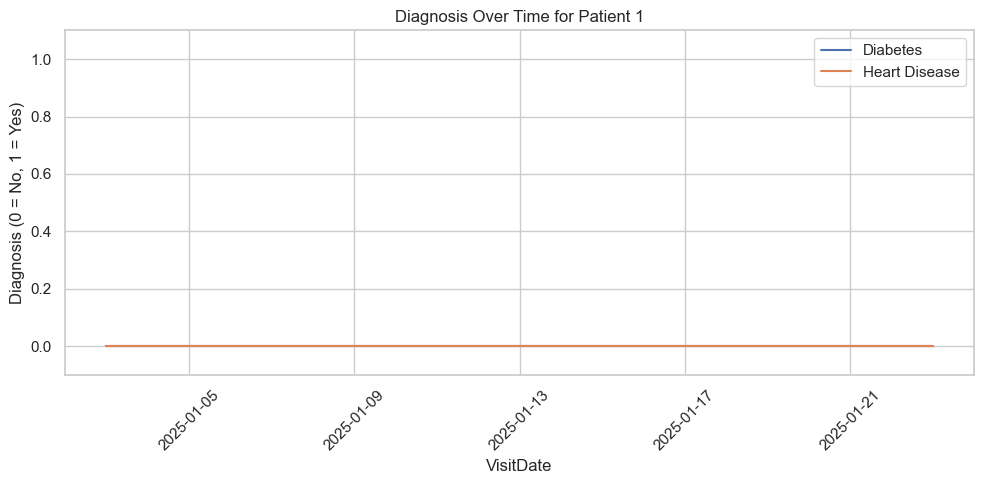

In [8]:
# Choose a patient to visualize
patient_id = df['PatientID'].iloc[0]  # or manually: e.g., 'P001'

# Filter and sort patient data
patient_df = df[df['PatientID'] == patient_id].sort_values('VisitDate')

# Plot their diagnosis trend
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(data=patient_df, x='VisitDate', y='Diabetes', label='Diabetes')
sns.lineplot(data=patient_df, x='VisitDate', y='HeartDisease', label='Heart Disease')
plt.title(f'Diagnosis Over Time for Patient {patient_id}')
plt.ylabel('Diagnosis (0 = No, 1 = Yes)')
plt.ylim(-0.1, 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/2w/rrfjt691637cny9_w1w9cxh80000gn/T/ipykernel_11472/253105768.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


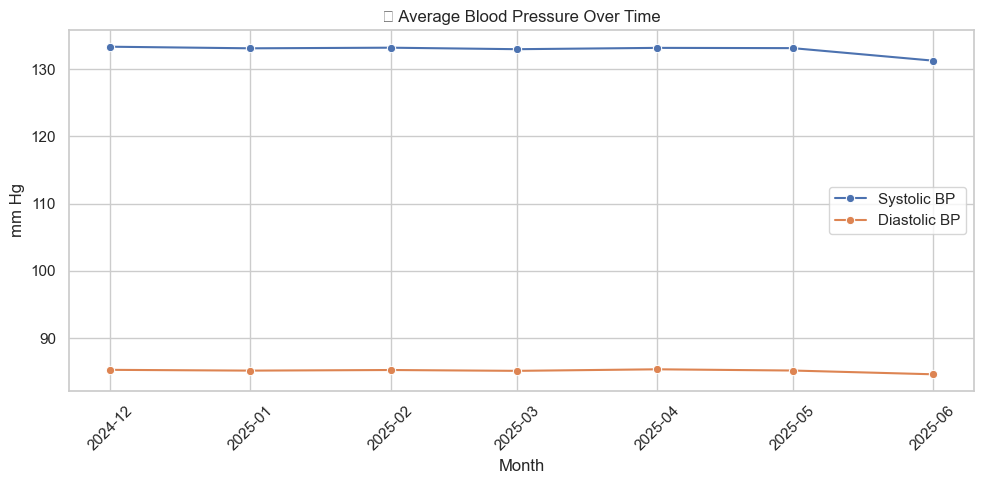

In [10]:
# Create a new column for Month (year + month)
df['Month'] = df['VisitDate'].dt.to_period('M').dt.to_timestamp()

# Group by month and calculate average BP
monthly_bp = df.groupby('Month')[['BP_Systolic', 'BP_Diastolic']].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_bp, x='Month', y='BP_Systolic', label='Systolic BP', marker='o')
sns.lineplot(data=monthly_bp, x='Month', y='BP_Diastolic', label='Diastolic BP', marker='o')
plt.title('📈 Average Blood Pressure Over Time')
plt.ylabel('mm Hg')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/2w/rrfjt691637cny9_w1w9cxh80000gn/T/ipykernel_11472/2653431054.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='AgeGroup', y='GlucoseLevel', palette='Set2')
/var/folders/2w/rrfjt691637cny9_w1w9cxh80000gn/T/ipykernel_11472/2653431054.py:11: UserWarning: Glyph 129656 (\N{DROP OF BLOOD}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129656 (\N{DROP OF BLOOD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


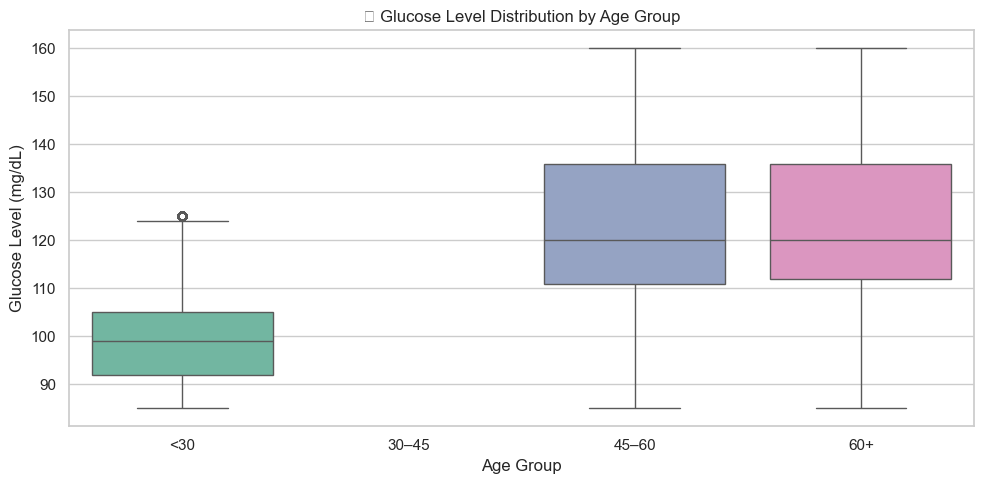

In [12]:
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 45, 60, 100],
                        labels=['<30', '30–45', '45–60', '60+'])

# Plot glucose level distribution across age groups
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='AgeGroup', y='GlucoseLevel', palette='Set2')
plt.title('🩸 Glucose Level Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Glucose Level (mg/dL)')
plt.tight_layout()
plt.show()


/var/folders/2w/rrfjt691637cny9_w1w9cxh80000gn/T/ipykernel_11472/1809755704.py:7: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/2w/rrfjt691637cny9_w1w9cxh80000gn/T/ipykernel_11472/1809755704.py:7: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/2w/rrfjt691637cny9_w1w9cxh80000gn/T/ipykernel_11472/1809755704.py:7: UserWarning: Glyph 129657 (\N{ADHESIVE BANDAGE}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylab

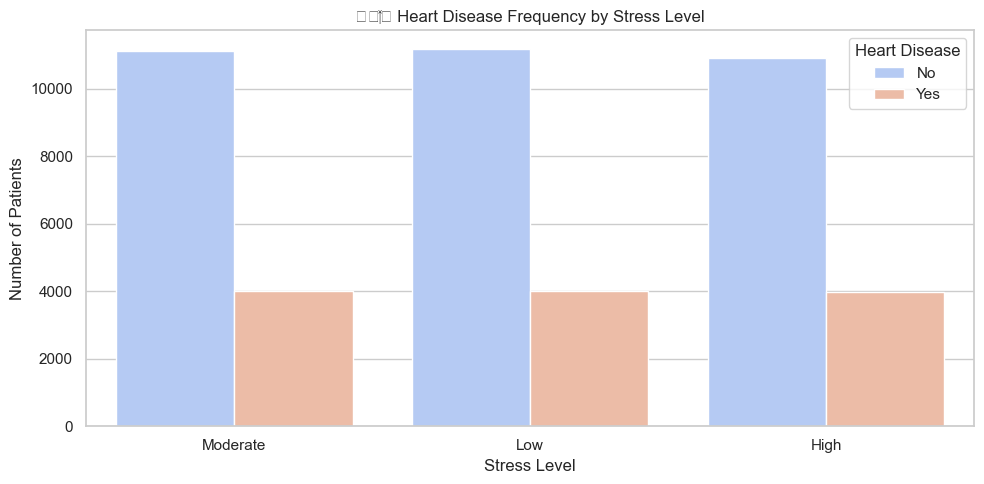

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='StressLevel', hue='HeartDisease', palette='coolwarm')
plt.title('❤️‍🩹 Heart Disease Frequency by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


/var/folders/2w/rrfjt691637cny9_w1w9cxh80000gn/T/ipykernel_11472/2798681322.py:25: UserWarning: Glyph 128716 (\N{SLEEPING ACCOMMODATION}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128716 (\N{SLEEPING ACCOMMODATION}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


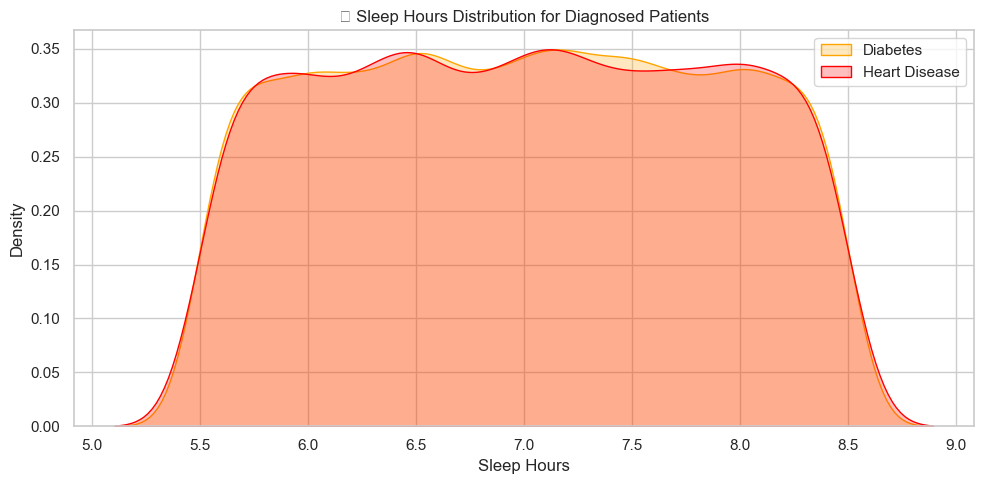

In [16]:
plt.figure(figsize=(10, 5))

# Density plot for diabetes
sns.kdeplot(
    data=df[df['Diabetes'] == 1],
    x='SleepHours',
    fill=True,
    label='Diabetes',
    color='orange'
)

# Density plot for heart disease
sns.kdeplot(
    data=df[df['HeartDisease'] == 1],
    x='SleepHours',
    fill=True,
    label='Heart Disease',
    color='red'
)

plt.title('🛌 Sleep Hours Distribution for Diagnosed Patients')
plt.xlabel('Sleep Hours')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()
